In [25]:
# リスト 6-1-1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 ---------
np.random.seed(seed = 0) # 乱数を固定する
X_min, X_max = 0, 2.5    # x の上限と下限 (表示用)
N = 30                   # データ数
col = ["cornflowerblue", "gray"] # クラス0,1の表示色
X = np.zeros(N)          # 空のXを準備する
T = np.zeros(N, dtype=np.uint8)          # 空のTを準備する
prm_s = [0.4, 0.8] # クラス0,1の分布の開始地点
prm_w = [0.8, 1.6] # クラス0,1の分布の幅
prm_pi = 0.5       # クラス0の全体に対する比率

for n in range(N):
    r = np.random.rand()
    T[n] = 0 * (r < prm_pi) + 1 * (r >= prm_pi)
    X[n] = prm_s[T[n]] + np.random.rand() * prm_w[T[n]]

# データ表示
print("X =", np.round(X, 2))
print("T =", T) # 体重X,性別Tの30個データを生成する

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


[False False  True  True False False False  True  True False False  True
  True  True False  True  True  True False False  True False False  True
  True False False  True False  True]
[0.91671529 1.1134184  0.46970344 1.06609588 1.02442334 0.91193682
 1.15573513 1.01938695 0.85474716 0.8941084  0.74962556 0.50314104
 0.69096862 0.52904761 0.59554047]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


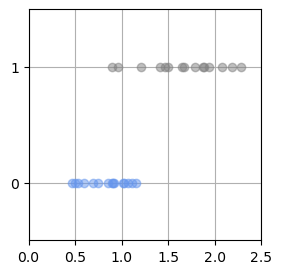

In [42]:
# リスト 6-1-2
# 0:メス､1:オス
print(T == 0)
print(X[T == 0])
print(T[T == 0])

# データ分布表示 ----
def show_data1d(x, t):
    for k in range(2):
        plt.plot(
            x[t == k], t[t == k], col[k], # col → color, col = ["cornflowerblue", "gray"]
            alpha=0.5, linestyle="none", marker="o",
        )
    plt.xticks(np.arange(0, 3, 0.5)) # メモリの位置(ラベルは位置の数値)
    plt.yticks([0, 1])               # 上記と同様(タプルでなくても配列でOK)
    plt.xlim(X_min, X_max)           # (X_min, X_max = 0, 2.5)
    plt.ylim(-0.5, 1.5)

# メイン -----
fig = plt.figure(figsize=(3, 3))     # figに代入することで後で操作しやすくなる
show_data1d(X, T)                    # X:質量, T:性別
plt.grid()                           # グリット表示
plt.show()                           # notebookなら別にいらない

In [27]:
# ログの関数

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# X = np.linspace(0.01, 1000 , 10000)
# Y = np.log(X)
# plt.plot(X,Y, "gray")
# plt.grid()
# plt.show()

In [28]:
# リスト 6-1-3
# ロジスティック回帰モデル ------
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

decision boundary = 1.25


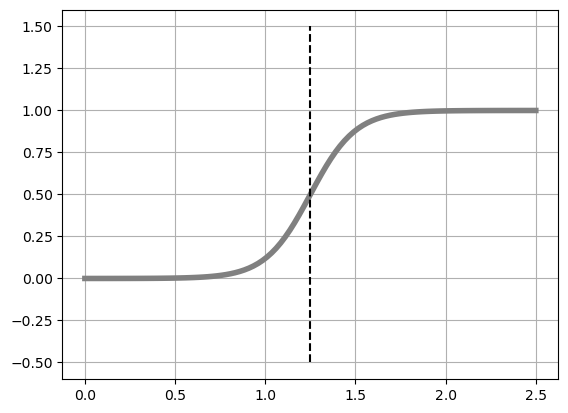

In [29]:
# リスト 6-1-4
# ロジスティック回帰モデルの表示 ------
def show_logistic(w):
    x = np.linspace(X_min, X_max, 100) # (X_min, X_max = 0, 2.5)を100分割
    y = logistic(x, w) # 6-1-3で定義した関数を使う
    plt.plot(x, y, "gray", linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))      # yの中で最初に0.5を超える値があるインデックスを取得している
    boundary = (x[i - 1] + x[i]) / 2   # 0.5を超える場所に近いところを推定している
    plt.plot([boundary, boundary], [-0.5, 1.5], "black", linestyle="--")
    return boundary

# テスト
w = np.array([8, -10])
b = show_logistic(w)
print(f'decision boundary = {b}')
plt.grid()
plt.show()

In [30]:
# リスト 6-1-5
# 平均交差エントロピー誤差 -------
def cee_logistic(w, x, t):
    y = logistic(x, w)

    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / N
    return cee

# test
w = np.array([1, 1])
cee = cee_logistic(w, X, T)
print(f"CEE = {cee:.6f}")

CEE = 1.028819


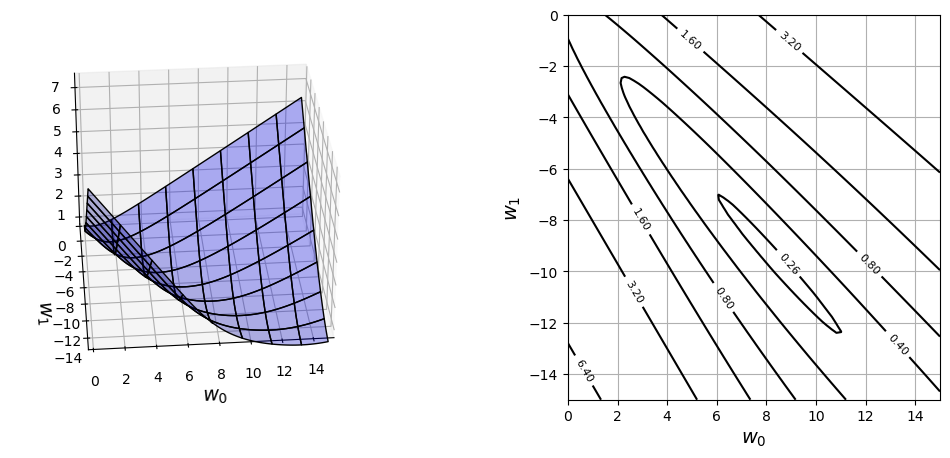

In [37]:
# リスト6-1-6
# 平均交差エントロピー誤差の計算 ----
w0_n, w1_n = 80, 80             # 等高線表示の解像度を示す
w0_min, w0_max = 0, 15
w1_min, w1_max = -15, 0
w0 = np.linspace(w0_min, w0_max, w0_n)
w1 = np.linspace(w1_min, w1_max, w1_n)
C = np.zeros((w1_n, w0_n))
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w = np.array([w0[i0], w1[i1]])
        C[i1, i0] = cee_logistic(w, X, T) # CEEの計算
ww0, ww1 = np.meshgrid(w0, w1)            # 描画用座標の作成

# グラフ描画 ---------
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
# サーフェスの表示
ax = plt.subplot(1,2,1, projection="3d")
ax.plot_surface(
    ww0, ww1, C,
    color="blue", edgecolor="black", rstride=10, cstride=10, alpha=0.3,
)
ax.set_xlabel("$w_0$", fontsize=14)
ax.set_ylabel("$w_1$", fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0.8)
ax.view_init(30, -95)

# 等高線表示
plt.subplot(1,2,2)
cont = plt.contour(
    ww0, ww1, C,
    colors="black", levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4],
)
cont.clabel(fmt="%.2f", fontsize=8)
plt.xlabel("$w_0$", fontsize=14)
plt.ylabel("$w_1$", fontsize=14)
plt.grid()
plt.show()

In [39]:
# リスト6-1-7
# 平均交差エントロピー誤差の微分
def dcee_logistic(w,x,t):
    y = logistic(x,w)
    
    dcee = np.zeros(2)       # 回答の受け皿
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / N
    return dcee

# テスト ----------
w = np.array([1,1])
dcee = dcee_logistic(w,X,T)
print("dCEE =", np.round(dcee, 6))

dCEE = [0.308579 0.394855]


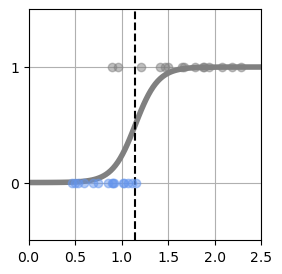

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


In [ ]:
# 勾配法による解
# リスト6-1-8
from scipy.optimize import minimize

# ロジスティック回帰モデルのパラメータ最適化
def fit_logistic(w_init,x,t):
    res = minimize(
        cee_logistic, w_init, args=(x,t),
        jac=dcee_logistic, method="CG",
    )
    return res.x                # minimizeの結果はresに格納される｡xに最適化後のパラメータが入ってる

# メイン ---------------------------------
w_init = np.array([1.0, -1.0])  # wの初期値
w = fit_logistic(w_init,X,T)    # wを計算
cee = cee_logistic(w,X,T)       # CEEを計算する

# グラフ描画 ------------------------------
plt.figure(figsize=(3,3))
boundary = (w)
show_data1d(X,T)
plt.grid()
plt.show()

# 結果表示 --------------------------------
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}")
print(f"CEE = {cee:.2f}")
print(f"Boundary = {boundary:.2f} g")

In [1]:
%reset

In [4]:
# リスト6-2-1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 -------------------
np.random.seed(seed=1)      # 乱数を固定
N = 100                     # データの数
K = 3                       # 分布の数
T3 = np.zeros((N,3), dtype=int)
T2 = np.zeros((N,2), dtype=int)
X = np.zeros((N,2))         #今までのX0,X1を統合してXで表す
X0_min, X0_max = -3, 3      #X0 の範囲､表示用
X1_min, X1_max = -3, 3      #x1 の範囲､表示用
prm_mu = np.array([[-0.5, -0.5], [0.5, 1.0], [1, -0.5]]) # 分布の中心
prm_sig = np.array([[0.7, 0.7], [0.8, 0.3], [0.3, 0.8]]) # 分布の分散
prm_pi = np.array([0.4, 0.8, 1]) # 各分布への割合を決めるパラメータ   
# 3クラス用のラベル"T3"を作成
for n in range(N):          # 各データのループ
    r = np.random.rand()
    for k in range(K):      # 各クラスのループ
        if r < prm_pi[k]:   # クラスを決める
            T3[n,k] = 1
            break           # クラスが決まったらkのループから抜ける
    for k in range(2):
        X[n,k] = \
            np.random.randn() * prm_sig[T3[n, :] == 1, k] \
            + prm_mu[T3[n, :] == 1, k]
# 2クラス用のラベル"T2"を作成
T2[:, 0] = T3[:, 0]
# T3クラス1と2をまとめてT2のクラス1とする
T2[:, 1] = T3[:, 1] | T3[:, 2]


C:\Users\Dialo\AppData\Local\Temp\ipykernel_10268\830963243.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n,k] = \


In [ ]:
maro = np.zeros(100)
for n in range(100):
    r = np.random.randn()
    maro[n] = r
print(maro)

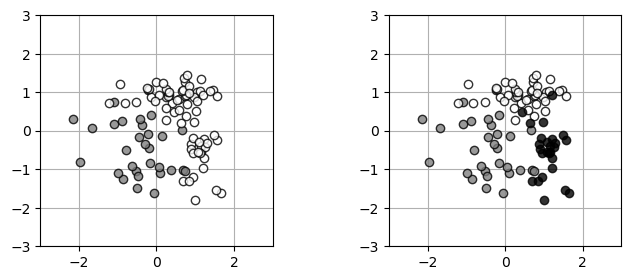

In [9]:
# リスト 6-2-(5)
# データ表示 ----------
def show_data2d(x, t):
    K = t.shape[1]  # tの列数からクラス数を取得
    col = ["gray", "white", "black"]
    for k in range(K):
        plt.plot(
            x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], col[k],
            marker="o", linestyle="None",
            markeredgecolor="black", alpha=0.8,
        )
        plt.xlim(X0_min, X0_max)
        plt.ylim(X1_min, X1_max)

# メイン ----------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
# 2クラス用データ表示
plt.subplot(1, 2, 1)
show_data2d(X, T2)
plt.grid()
# 3クラス用データ表示
plt.subplot(1, 2, 2)
show_data2d(X, T3)
plt.xlim(X0_min, X0_max)
plt.ylim(X1_min, X1_max)
plt.grid()
plt.show()